Importando as bibliotecas pandas, numpy e warnings

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Concatenando os arquivos que serão usados para o treino e teste do modelo de regressão logística


*   SVP- B3LYP
*   TZVP - B3LYP
*   TZVPP - B3LYP
*   QZVP - B3LYP
*   QZVPP - B3LYP



In [2]:
df_1 = pd.read_csv('CPprop_svp_b3lyp.csv')
df_2 = pd.read_csv('CPprop_tzvp_b3lyp.csv')
df_3 = pd.read_csv('CPprop_tzvpp_b3lyp.csv')
df_4 = pd.read_csv('CPprop_qzvp_b3lyp.csv')
df_5 = pd.read_csv('CPprop_qzvpp_b3lyp.csv')

df= pd.concat([df_1, df_2, df_3, df_4, df_5], axis=0)

In [3]:
df

,Unnamed: 0,CP,(X),(Y),(Z),Rank,Signature,Pair,Type of CP,Lambda 1,Lambda 2,Lambda 3,Laplacian of electron density
0,0,1,13.847912,-7.802679,13.173282,3,-3,(3;-3),Nuclear,-1.921485e+05,-1.921469e+05,-1.921341e+05,-5.764295e+05
1,1,2,16.606674,2.276231,14.352396,3,1,(3;+1),Anel,-1.110164e-05,1.363927e-05,1.718308e-04,1.743685e-04
2,2,3,14.309467,-6.208047,13.006426,3,-1,(3;-1),Ligação,-5.108061e-01,-4.716551e-01,3.270288e-01,-6.554323e-01
3,3,4,14.266585,-4.629427,11.507464,3,-1,(3;-1),Ligação,-4.126764e-01,-3.988219e-01,3.110247e-01,-5.004736e-01
4,4,5,14.869234,-4.721211,9.192119,3,-1,(3;-1),Ligação,-4.339622e-01,-4.326227e-01,3.170151e-01,-5.495697e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,337,338,23.315450,21.147933,4.017559,3,-3,(3;-3),Nuclear,-7.459005e+05,-7.458896e+05,-7.458802e+05,-2.237670e+06
338,338,339,25.879810,21.599578,2.728766,3,-3,(3;-3),Nuclear,-7.471690e+05,-7.471637e+05,-7.471511e+05,-2.241484e+06
339,339,340,26.078231,20.354248,0.117163,3,-3,(3;-3),Nuclear,-7.473869e+05,-7.473848e+05,-7.473666e+05,-2.242138e+06
340,340,341,24.305667,21.476746,-1.776343,3,-3,(3;-3),Nuclear,-1.638373e+06,-1.638372e+06,-1.638337e+06,-4.915082e+06


Filtrando os pontos críticos de ligação e armazenando na varíavel df_ligacao

In [4]:
df_ligacao=df[df['Pair']=='(3;-1)']
df_ligacao

,Unnamed: 0,CP,(X),(Y),(Z),Rank,Signature,Pair,Type of CP,Lambda 1,Lambda 2,Lambda 3,Laplacian of electron density
2,2,3,14.309467,-6.208047,13.006426,3,-1,(3;-1),Ligação,-0.510806,-0.471655,0.327029,-0.655432
3,3,4,14.266585,-4.629427,11.507464,3,-1,(3;-1),Ligação,-0.412676,-0.398822,0.311025,-0.500474
4,4,5,14.869234,-4.721211,9.192119,3,-1,(3;-1),Ligação,-0.433962,-0.432623,0.317015,-0.549570
5,5,6,13.915598,-2.729093,10.081429,3,-1,(3;-1),Ligação,-0.435915,-0.434642,0.318631,-0.551926
6,6,7,15.165359,-0.006485,17.876204,3,-1,(3;-1),Ligação,-0.000805,-0.000773,0.005640,0.004062
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,299,9.626320,17.126341,11.351098,3,-1,(3;-1),Ligação,-0.541968,-0.494572,0.382488,-0.654052
299,299,300,8.364001,19.010106,12.194377,3,-1,(3;-1),Ligação,-0.858692,-0.845137,0.500471,-1.203358
300,300,301,14.946750,13.385670,10.746412,3,-1,(3;-1),Ligação,-0.792608,-0.600216,0.334535,-1.058289
301,301,302,10.484965,15.798354,9.816078,3,-1,(3;-1),Ligação,-0.879275,-0.851495,0.493148,-1.237622


In [26]:
df_ligacao.shape

(836, 5)

Observe que teremos 836 dados que serão utilizados no nosso modelo de classificação logística

Criando a coluna 'Tipo de Ligação Química' a partir da coluna 'Laplacian of electron density' com as variáveis binárias:

  **1 - ligação covalente**

  **0 - ligação não covalente**



In [5]:
df_ligacao['Tipo de Ligação Química'] = np.where(df_ligacao['Laplacian of electron density']>0, '0', '1')
df_ligacao

,Unnamed: 0,CP,(X),(Y),(Z),Rank,Signature,Pair,Type of CP,Lambda 1,Lambda 2,Lambda 3,Laplacian of electron density,Tipo de Ligação Química
2,2,3,14.309467,-6.208047,13.006426,3,-1,(3;-1),Ligação,-0.510806,-0.471655,0.327029,-0.655432,1
3,3,4,14.266585,-4.629427,11.507464,3,-1,(3;-1),Ligação,-0.412676,-0.398822,0.311025,-0.500474,1
4,4,5,14.869234,-4.721211,9.192119,3,-1,(3;-1),Ligação,-0.433962,-0.432623,0.317015,-0.549570,1
5,5,6,13.915598,-2.729093,10.081429,3,-1,(3;-1),Ligação,-0.435915,-0.434642,0.318631,-0.551926,1
6,6,7,15.165359,-0.006485,17.876204,3,-1,(3;-1),Ligação,-0.000805,-0.000773,0.005640,0.004062,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,299,9.626320,17.126341,11.351098,3,-1,(3;-1),Ligação,-0.541968,-0.494572,0.382488,-0.654052,1
299,299,300,8.364001,19.010106,12.194377,3,-1,(3;-1),Ligação,-0.858692,-0.845137,0.500471,-1.203358,1
300,300,301,14.946750,13.385670,10.746412,3,-1,(3;-1),Ligação,-0.792608,-0.600216,0.334535,-1.058289,1
301,301,302,10.484965,15.798354,9.816078,3,-1,(3;-1),Ligação,-0.879275,-0.851495,0.493148,-1.237622,1


A coluna 'Laplacian of electron density' é soma das colunas 'Lambda 1, Lambda 2, Lambda 3'. De forma resumida, a coluna 'Laplacian of electron density' funciona como indicador para classificar as ligações químicas da coluna 'Pair' (3;-1). Para isso, basta olharmos apenas o sinal dos valores da coluna 'Laplacian of electron density'. Se o sinal for **negativo**, então a ligação química é categorizada como covalente, caso seja **positivo** a ligação é não covalente como foi mostrado acima.

A coluna 'CP' não será usada no modelo de classificação, mas ela será importante, pois ela tem como função mapear a localização das interações químicas da macromolécula.

Filtrando as colunas do df_ligacao

In [6]:
df_ligacao=df_ligacao[['CP', 'Lambda 1', 'Lambda 2', 'Lambda 3','Tipo de Ligação Química']]
df_ligacao

,CP,Lambda 1,Lambda 2,Lambda 3,Tipo de Ligação Química
2,3,-0.510806,-0.471655,0.327029,1
3,4,-0.412676,-0.398822,0.311025,1
4,5,-0.433962,-0.432623,0.317015,1
5,6,-0.435915,-0.434642,0.318631,1
6,7,-0.000805,-0.000773,0.005640,0
...,...,...,...,...,...
298,299,-0.541968,-0.494572,0.382488,1
299,300,-0.858692,-0.845137,0.500471,1
300,301,-0.792608,-0.600216,0.334535,1
301,302,-0.879275,-0.851495,0.493148,1


Transformando a coluna 'Tipo de Ligação Química' em inteiro

In [7]:
df_ligacao['Tipo de Ligação Química']=df_ligacao['Tipo de Ligação Química'].astype(int)

Verificando se nenhuma coluna do df_ligacao é string

In [8]:
df_ligacao.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 836 entries, 2 to 304
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CP                       836 non-null    int64  
 1   Lambda 1                 836 non-null    float64
 2   Lambda 2                 836 non-null    float64
 3   Lambda 3                 836 non-null    float64
 4   Tipo de Ligação Química  836 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 39.2 KB


Verificando se existem dados duplicados

In [9]:
df_ligacao.duplicated()

2      False
3      False
4      False
5      False
6      False
       ...  
298    False
299    False
300    False
301    False
304    False
Length: 836, dtype: bool

In [10]:
df_ligacao.isna().sum()

CP                         0
Lambda 1                   0
Lambda 2                   0
Lambda 3                   0
Tipo de Ligação Química    0
dtype: int64

Verificando se existem valores NaN no DataFrame

In [11]:
df_ligacao.isnull().sum()

CP                         0
Lambda 1                   0
Lambda 2                   0
Lambda 3                   0
Tipo de Ligação Química    0
dtype: int64

Agora verificaremos, por meio de um gráfico de barras, a quantidade de ligações covalentes e não convalentes existentes no DataFrame.

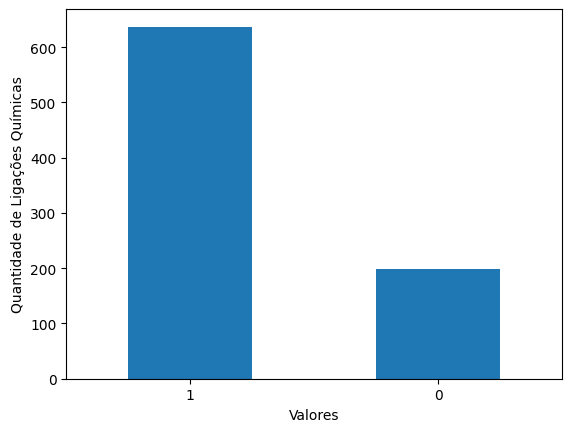

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

frequencia = df_ligacao["Tipo de Ligação Química"].value_counts()

frequencia.plot(kind='bar')

plt.xlabel('Valores')
plt.ylabel('Quantidade de Ligações Químicas')
plt.xticks(rotation=0)

plt.show()

Com base do gráfico acima, observa-se que nesse DataFrame existem um pouco mais de 600 ligações covalentes e um pouco menos de 200 ligações não covalentes.


Importando as bibliotecas para o modelo de regressão logística e as bibliotecas para calcular as métricas do modelo

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score


Separando as features do 'df_ligacao' que serão usadas para treino e teste. Como foi observado, vamos selecionas as colunas 'lambda 1, Lambda 2, Lambda 3, como input para nosso modelo de classificação e a coluna 'Tipo de ligação Química' será o nosso output pro modelo.

In [14]:
X=df_ligacao[['Lambda 1', 'Lambda 2', 'Lambda 3']]
y=df_ligacao['Tipo de Ligação Química']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


Treinando o modelo de regressão logistica com as features selecionadas

In [15]:
modelo_regressao_logistica=LogisticRegression()
modelo_regressao_logistica.fit(X_train, y_train)
y_pred = modelo_regressao_logistica.predict(X_test)

Verificando a acurácia do modelo com os dados de teste

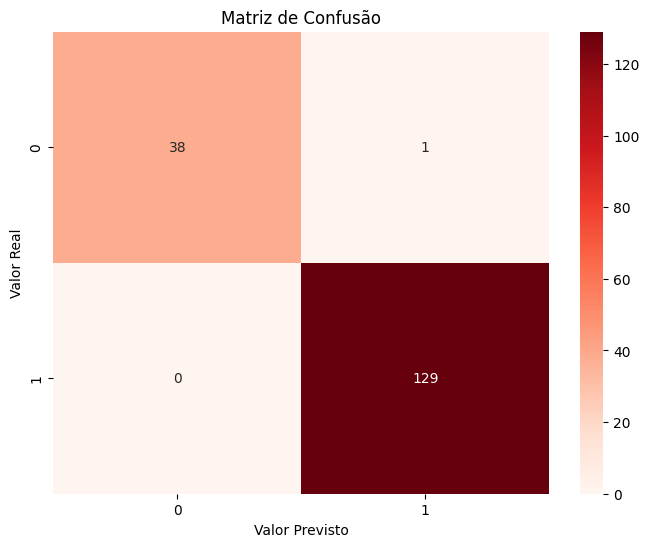

In [16]:
confusion_matrix = confusion_matrix(y_test, y_pred)
#print(confusion_matrix)

# Criando um DataFrame a partir da matriz de confusão
confusion_df = pd.DataFrame(confusion_matrix, index=np.unique(y), columns=np.unique(y))

# Plotando a matriz de confusão usando matplotlib e seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df, annot=True, cmap='Reds', fmt='d')
plt.title('Matriz de Confusão')
plt.xlabel('Valor Previsto')
plt.ylabel('Valor Real')
plt.show()

In [17]:
print(f'Acurácia: ', metrics.accuracy_score(y_test, y_pred))
print(f'Precisão: ',  precision_score(y_test, y_pred))
print(f'Recall: ', recall_score(y_test, y_pred))
print(f'F1-Score:' , f1_score(y_test, y_pred))


Acurácia:  0.9940476190476191
Precisão:  0.9923076923076923
Recall:  1.0
F1-Score: 0.9961389961389961


Como podemos ver, o modelo conseguiu uma acurácia de aproximadamente 99%, resultando em uma boa taxa de acerto para um modelo de classificação.

Para garantirmos uma boa validação em nosso modelo, vamos utilizar um o arquivo 'teste_blyp.csv', que não foi utilizado nos dados de treino e teste do modelo, para consolidarmos a confiabilidade do modelo feito.




In [18]:
df_teste = pd.read_csv('teste_blyp.csv')
df_teste=df_teste[df_teste['Pair']=='(3;-1)']
df_teste=df_teste[['Lambda 1', 'Lambda 2', 'Lambda 3']]
df_teste


,Lambda 1,Lambda 2,Lambda 3
1,-0.463292,-0.446305,0.354568
3,-0.504406,-0.463858,0.342274
4,-0.426863,-0.425941,0.325472
5,-0.734976,-0.717569,0.372542
6,-0.405667,-0.392604,0.320596
...,...,...,...
318,-1.239321,-1.231574,0.967546
324,-0.289805,-0.119355,1.081915
326,-1.283331,-1.201358,0.939955
327,-0.748623,-0.727262,0.360620


In [19]:
df_teste.shape

(173, 3)

Podemos observar que, após filtrarmos os dados de interesse, temos 173 interações químicas para o nosso modelo classificar do arquivo 'teste_blyp.csv'

Testando o modelo com os dados do DataFrame 'df_teste' e mostrando o resultado no DataFrame   'df_regressao_logistica'

In [20]:
resultado=modelo_regressao_logistica.predict(df_teste)
resultado
df_regressao_logistica=pd.DataFrame(resultado, columns=['Regressão Logistica'])
df_regressao_logistica

,Regressão Logistica
0,1
1,1
2,1
3,1
4,1
...,...
168,1
169,0
170,1
171,1


Criando a coluna 'Teste' do arquivo 'teste_blyp' a partir da coluna 'Laplacian of electron density'

In [21]:
df_teste = pd.read_csv('teste_blyp.csv')
df_teste=df_teste[df_teste['Pair']=='(3;-1)']
df_teste['Teste'] = np.where(df_teste['Laplacian of electron density']>0, '0', '1')
df_teste['Teste']=df_teste['Teste'].astype(int)

Filtrando as colunas 'CP' e 'Teste' do DataFrame com os dados do arquivo 'teste_blyp'

In [22]:
df_teste=df_teste[['CP', 'Teste']]
df_teste = df_teste.reset_index(drop=True) ##resetando o indice do df_teste
df_teste


,CP,Teste
0,2,1
1,4,1
2,5,1
3,6,1
4,7,1
...,...,...
168,319,1
169,325,0
170,327,1
171,328,1


Concatenando o 'df_teste' com o 'df_regressao_logistica' e comparando os resultados

In [23]:
df_teste['Regressão Logistica']=df_regressao_logistica
df_teste.tail(50)



,CP,Teste,Regressão Logistica
123,219,1,1
124,220,0,0
125,221,0,0
126,226,1,1
127,227,1,1
128,229,1,1
129,230,1,1
130,232,0,0
131,233,0,0
132,234,1,1


In [24]:
df_teste=df_teste[['Teste', 'Regressão Logistica']]
df_teste

,Teste,Regressão Logistica
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
168,1,1
169,0,0
170,1,1
171,1,1


In [25]:
validacao = df_teste[["Teste", "Regressão Logistica"]].value_counts()
print(validacao)


Teste  Regressão Logistica
1      1                      121
0      0                       44
       1                        8
dtype: int64


Como era esperado, observa-se que o nosso modelo de classificação acertou 121 interações químicas do tipo covalente e acertou 44 interações do tipo não covalente. Além disso, o nosso modelo errou apenas 8 interações químicas, ou seja, em vez da ligação ter sido classificada como covalente, o nosso modelo previu que ela fosse não covalente ou vice-versa.

O resultado é de suma importância, pois concorda com a métrica de acurácia do nosso modelo que foi aproximadante 99%. Há vários fatores para essa taxa de acerto ter sido alta, um deles é que o modelo mostrado não apresentou um grau de complexidade alto para escolher as features para máquina de classificação, resultando, assim, em uma boa acurácia. Mas também, o volume de dados utilizados não foi o bastante para ser utilizado no modelo. Talvez um maior volume de dados acarretaria em uma taxa de acerto diferente do que foi alcançada.

Em suma, a aplicação de modelos de Machine Learning nos campos da química, bioquímica e dinâmica molecular tem grande potencial para revolucionar o desenvolvimento de fármacos e medicamentos. Garantir a boa acurácia desses modelos é de extrema importância para garantir resultados confiáveis e impulsionar avanços significativos na área da pesquisa farmacêutica.
